# ***CUSTOMER CHURN PREDICTION MODEL***

In [3]:
import pandas as pd
import numpy  as np
import  random
import matplotlib.pyplot as plt


In [11]:
df  = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')


# **DATA EXPLORATION**


In [12]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df  =   df.drop('customerID',axis = 'columns')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
print(df.TotalCharges.values)
print(df.MonthlyCharges.values)

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
[ 29.85  56.95  53.85 ...  29.6   74.4  105.65]


*In above cell  we can seethat **'Total charges'** are of string datatype we should changeit into numerical datatype*



* **to_numeric** used to change the datatype to float
* error  = 'coerce' will ignore(skip) all the null values  


* There are some null vlaues in  the data set so we have to exclude those values and include them in new dataframe*

In [15]:
df[pd.to_numeric(df.TotalCharges,errors ='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df1 = df[df.TotalCharges!=" "]

In [17]:
df1.shape

(7032, 20)

In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-18-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
tenure_Churn_Yes= df1[df.Churn=='Yes'].tenure
tenure_Churn_No= df1[df.Churn=='No'].tenure


<ipython-input-21-e5ab63eb5495>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_Churn_Yes= df1[df.Churn=='Yes'].tenure
<ipython-input-21-e5ab63eb5495>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_Churn_No= df1[df.Churn=='No'].tenure


Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

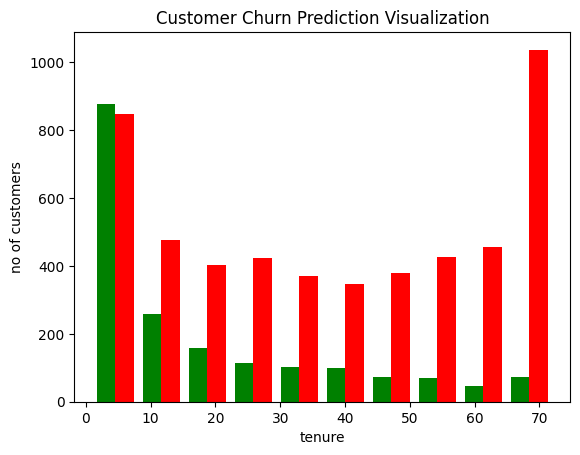

In [22]:
plt.hist([tenure_Churn_Yes,tenure_Churn_No],color =  ['green','red'])
plt.xlabel("tenure")
plt.ylabel("no of customers")
plt.title("Customer Churn Prediction Visualization")

<ipython-input-23-8fe31459a651>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mc_Churn_Yes= df1[df.Churn=='Yes'].MonthlyCharges
<ipython-input-23-8fe31459a651>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mc_Churn_No= df1[df.Churn=='No'].MonthlyCharges


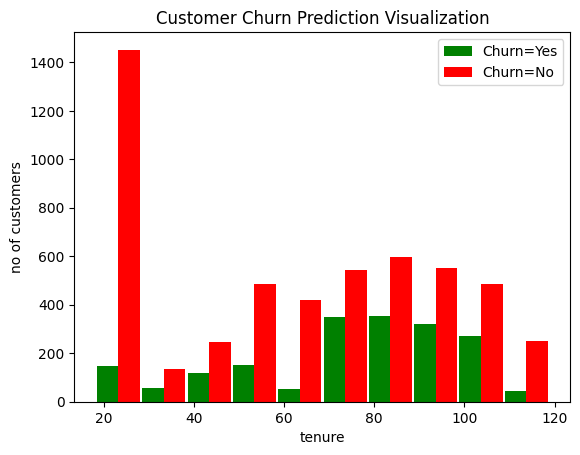

In [23]:
mc_Churn_Yes= df1[df.Churn=='Yes'].MonthlyCharges
mc_Churn_No= df1[df.Churn=='No'].MonthlyCharges
plt.hist([mc_Churn_Yes,mc_Churn_No], rwidth=0.95, color =  ['green','red'], label  = ["Churn=Yes","Churn=No"])
plt.xlabel("tenure")
plt.ylabel("no of customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()

In [24]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# **DATA CLEANING**

In [26]:
df1.replace('No internet service','No',inplace= True)
df1.replace('No phone service','No',inplace= True)

<ipython-input-26-d69893b26356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace= True)
<ipython-input-26-d69893b26356>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace= True)


In [27]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace= True)

<ipython-input-28-7068909b0b59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace= True)


In [29]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [31]:
df1['gender'].replace({'Male':1, 'Female':0}, inplace =  True)

<ipython-input-31-84bcbfbf3f21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male':1, 'Female':0}, inplace =  True)


In [32]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')


gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


**ONE HOT ENCODING**

In [33]:
df2  = pd.get_dummies(data = df1, columns = ['PaymentMethod','InternetService','Contract'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [34]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]


**Up  to now we have done data cleaning**

# **SCALING**

In [35]:
columns_to_scaled  = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[columns_to_scaled] = scaler.fit_transform(df2[columns_to_scaled])

In [36]:
for  col in df2:
  print(f'{col}:{df2[col].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

**If we want to change the  values of tenure,Monthly charges, Total Charges to 0 and 1 according to condition (if x>0.5 : 1 else 0)**

**We can use below statements**

* df2['tenure'] = df2['tenure'].apply(lambda x:1 if x>0.5 else 0)
* df2['MonthlyCharges'] = df2['MonthlyCharges'].apply(lambda x:1 if x>0.5 else 0)
* df2['TotalCharges'] = df2['TotalCharges'].apply(lambda x:1 if x>0.5 else 0)

In [37]:
df2.sample(4)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
4121,1,1,1,0,0.366197,1,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0
2137,1,0,1,1,0.154930,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2622,1,1,1,1,0.380282,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6583,0,0,0,0,0.295775,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [38]:
x = df2.drop('Churn', axis ='columns')
y = df2['Churn']

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=6)

In [40]:
print(x_train.shape)
print(x_test.shape)

(4219, 26)
(2813, 26)


In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D


model  = Sequential()
model.add(Dense(20, input_shape=(26,),activation ='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)


Epoch 1/100
132/132 [==============================] - 2s 4ms/step - loss: 0.6131 - accuracy: 0.6767
Epoch 2/100
132/132 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7300
Epoch 3/100
132/132 [==============================] - 1s 5ms/step - loss: 0.5247 - accuracy: 0.7300
Epoch 4/100
132/132 [==============================] - 1s 7ms/step - loss: 0.5035 - accuracy: 0.7300
Epoch 5/100
132/132 [==============================] - 1s 7ms/step - loss: 0.4862 - accuracy: 0.7374
Epoch 6/100
132/132 [==============================] - 2s 12ms/step - loss: 0.4727 - accuracy: 0.7563
Epoch 7/100
132/132 [==============================] - 1s 8ms/step - loss: 0.4631 - accuracy: 0.7687
Epoch 8/100
132/132 [==============================] - 1s 6ms/step - loss: 0.4561 - accuracy: 0.7741
Epoch 9/100
132/132 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.7765
Epoch 10/100
132/132 [==============================] - 0s 3ms/step - loss: 0.4474 - accur

In [42]:
model.evaluate(x_test,y_test)


88/88 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8087


[0.41144034266471863, 0.8087450861930847]

* **In the above model we are using loss= binary_crossentropy and optimizer as stochastic gradient descent**

* **The accuracy for the above model after 100 epochs is around = 80.66%**

* **Now we will change the optimizer as adam**


*   List item
*   List item



In [43]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D


model2  = Sequential()
model2.add(Dense(20, input_shape=(26,),activation ='relu'))
model2.add(Dense(32,activation ='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.fit(x_train,y_train,epochs=100)

Epoch 1/100
132/132 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7255
Epoch 2/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7838
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.7886
Epoch 4/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7973
Epoch 5/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7945
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7971
Epoch 7/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7954
Epoch 8/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.7966
Epoch 9/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8000
Epoch 10/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4178 - accura

In [44]:
model2.evaluate(x_test,y_test)

88/88 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7942


[0.4573252201080322, 0.7941699028015137]

* **In the above model we are using loss= binary_crossentropy and optimizer as stochastic gradient descent**

* **The accuracy for the above model after 100 epochs is around = 79.13%**

In [45]:
yp = model2.predict(x_test)

88/88 [==============================] - 0s 1ms/step


In [46]:
y_pred = []

for element in  yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


In [47]:
y_pred[:20]

[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# **Results (classification  report)**

In [48]:

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2083
           1       0.62      0.54      0.58       730

    accuracy                           0.79      2813
   macro avg       0.73      0.71      0.72      2813
weighted avg       0.79      0.79      0.79      2813



Text(95.72222222222221, 0.5, 'Truth')

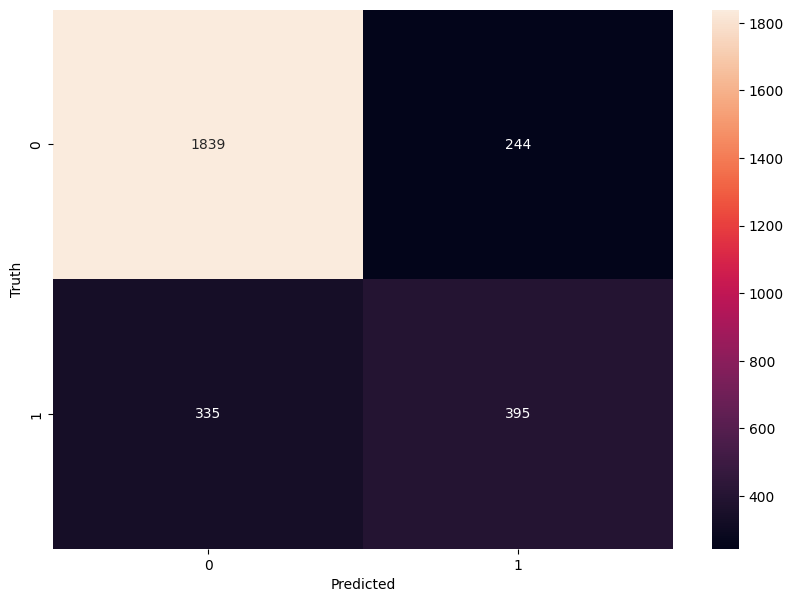

In [49]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Accuracy**

In [3]:
round((1839+395)/(1839+395+335+244),2)

0.79

**Precision for 0 class i.e; Precision for customers
 who did not churn**

In [4]:
round(1839/(1839+335),2)

0.85

**Precision for 1 class i.e; Precision for customers
 who actually churn**

In [5]:
round(395/(395+244),2)

0.62

**Recall for class 0**

In [7]:
round(1839/(1839+244),2)

0.88

**Recall for class 1**

In [9]:
round(395/(395+335),2)

0.54